In [6]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.cm import get_cmap
import seaborn as sns
import string
import pickle # save data frame (results) in a .pkl file
import pandas as pd
from datetime import datetime
import os, sys
import re


sys.path.insert(0, 'C:/Users/User/Code/MMDGraph')
#from importlib import reload
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC
#reload(readfoldertopanda)
import importlib
importlib.reload(sys.modules['mmdutils'])
from mmdutils import readfoldertopanda, PlotROCGeneral, plotVaryingBGDEG, findAUC


In [7]:
keys = ['p1', 'p2', 'nr_nodes_1','nr_nodes_2', 'n', 'm']
params_kernel = {}
data_auc = {}
data = {}

# VH

[0]
Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'exponent',
       'p1', 'p2', 'n', 'm', 'timestap', 'B', 'N', 'run_time', 'MMD_b',
       'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'MMD_l', 'with_labels',
       'sinkhorn'],
      dtype='object')


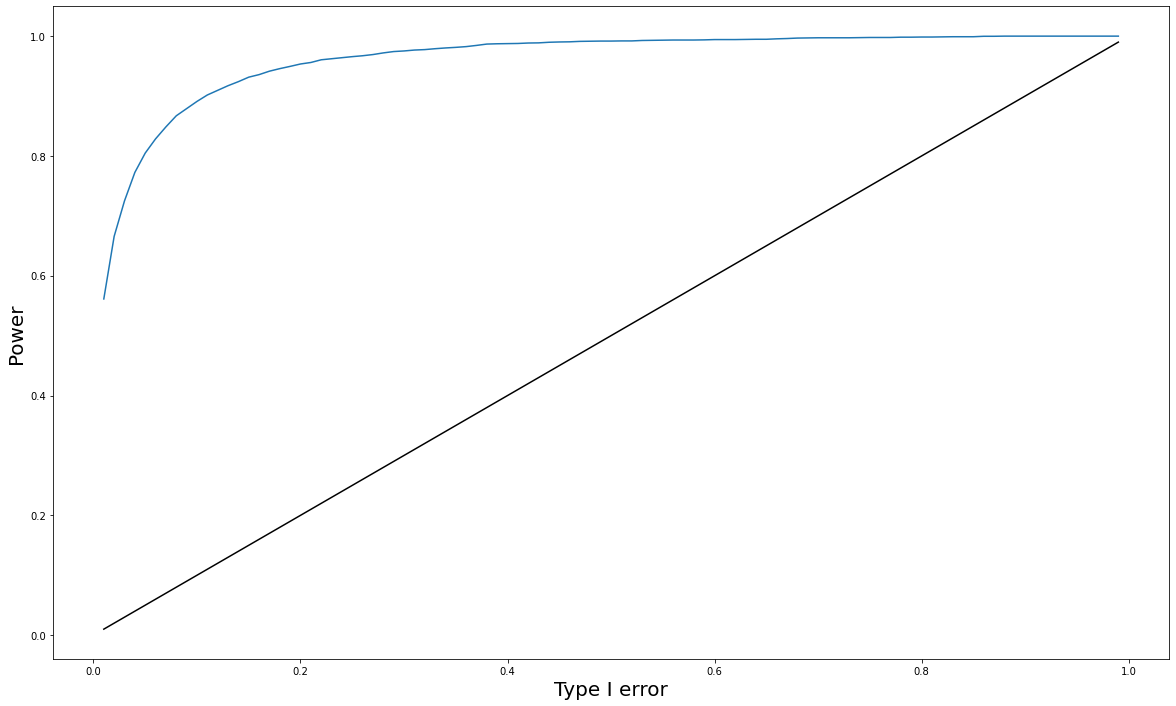

In [9]:
data['VH'] = readfoldertopanda("../data/SignedEdges2/VH")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
print(np.unique(data['VH']['normalize']))
print(data['VH'].columns)

params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'p1':0.6,
                'p2':0.55
                }


plotVaryingBGDEG(df = data['VH'].copy(), param_vary_name = "norm", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. eigenvalues', set_legend=False)

params_kernel['VH'] = [ 'normalize']
data_auc['VH'] = findAUC(keys = keys, params = params_kernel['VH'], stats = ['MMD_b', 'MMD_u'], df = data['VH'] )


# EH

[0]
Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'exponent',
       'p1', 'p2', 'n', 'm', 'timestap', 'B', 'N', 'run_time', 'MMD_b',
       'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'MMD_l', 'with_labels',
       'sinkhorn'],
      dtype='object')


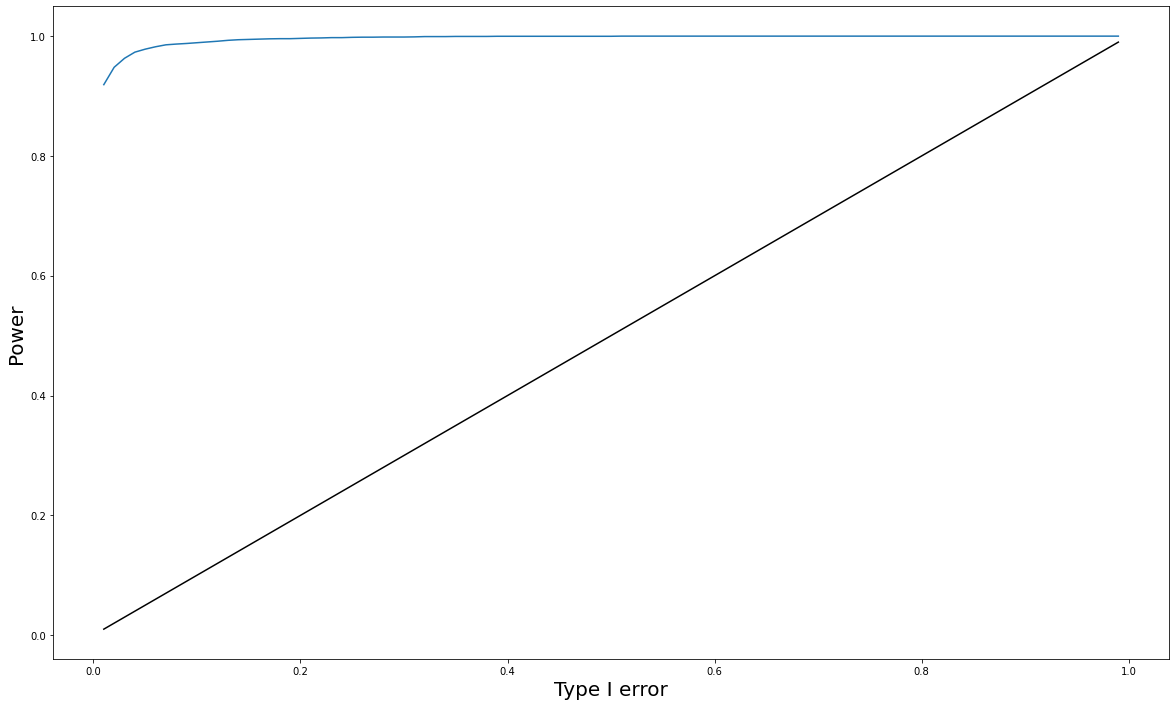

In [10]:
data['EH'] = readfoldertopanda("../data/SignedEdges2/EH")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
print(np.unique(data['EH']['normalize']))
print(data['EH'].columns)

params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'p1':0.6,
                'p2':0.55
                }


plotVaryingBGDEG(df = data['EH'].copy(), param_vary_name = "norm", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. eigenvalues', set_legend=False)

params_kernel['EH'] = [ 'normalize']
data_auc['EH'] = findAUC(keys = keys, params = params_kernel['EH'], stats = ['MMD_b', 'MMD_u'], df = data['EH'] )


# RW

[0]
Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'exponent',
       'p1', 'p2', 'n', 'm', 'timestap', 'B', 'N', 'run_time', 'MMD_b',
       'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'MMD_l', 'with_labels',
       'type', 'discount', 'sinkhorn', 'r', 'normalize_adj',
       'row_normalize_adj'],
      dtype='object')


C:/Users/User/Code/MMDGraph\mmdutils.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[param_vary_name].fillna(value=99999, inplace=True)


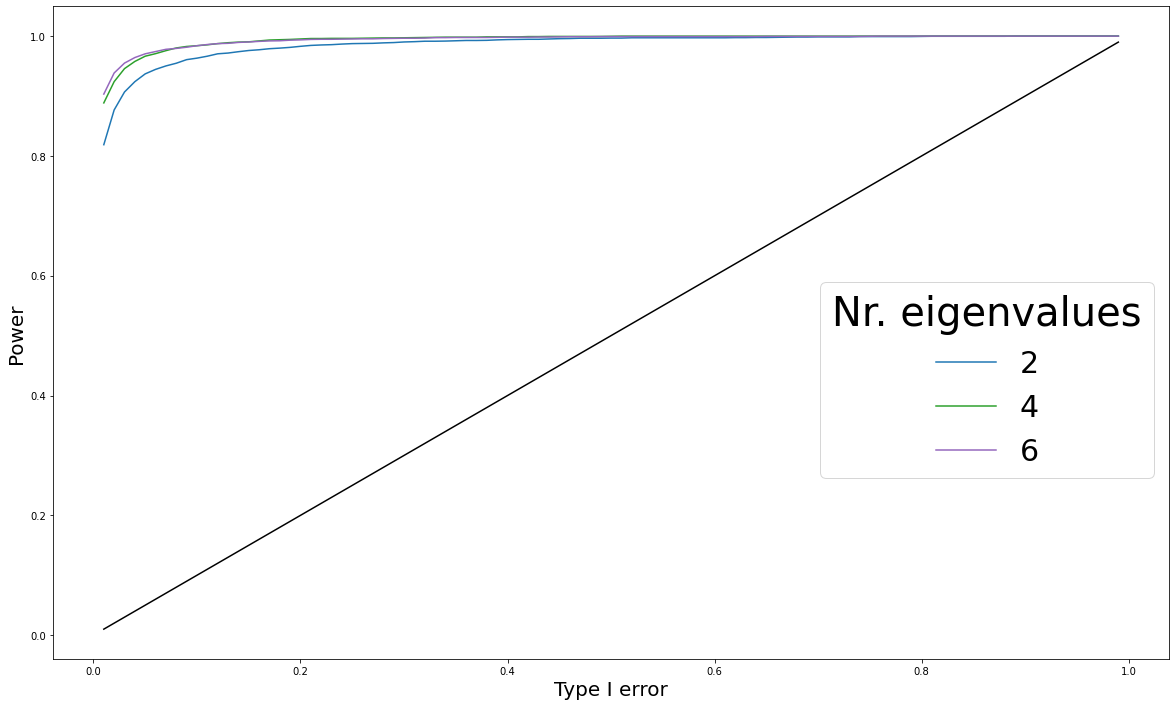

In [21]:
data['RW'] = readfoldertopanda("../data/SignedEdges2/RW")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
print(np.unique(data['RW']['normalize']))
print(data['RW'].columns)

params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'p1':0.6,
                'p2':0.55,
                'discount':0.001
                }


plotVaryingBGDEG(df = data['RW'].copy(), param_vary_name = "r", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. eigenvalues', set_legend=True)

params_kernel['RW'] = [ 'normalize', 'r', 'discount']
data_auc['RW'] = findAUC(keys = keys, params = params_kernel['RW'], stats = ['MMD_b', 'MMD_u'], df = data['RW'] )


# WLOA

[0]
Index(['kernel', 'alpha', 'normalize', 'nr_nodes_1', 'nr_nodes_2', 'exponent',
       'p1', 'p2', 'n', 'm', 'timestap', 'B', 'N', 'run_time', 'MMD_b',
       'MMD_b_distfree', 'MMD_u', 'MMD_u_distfree', 'MMD_l', 'nitr',
       'with_labels', 'sinkhorn'],
      dtype='object')


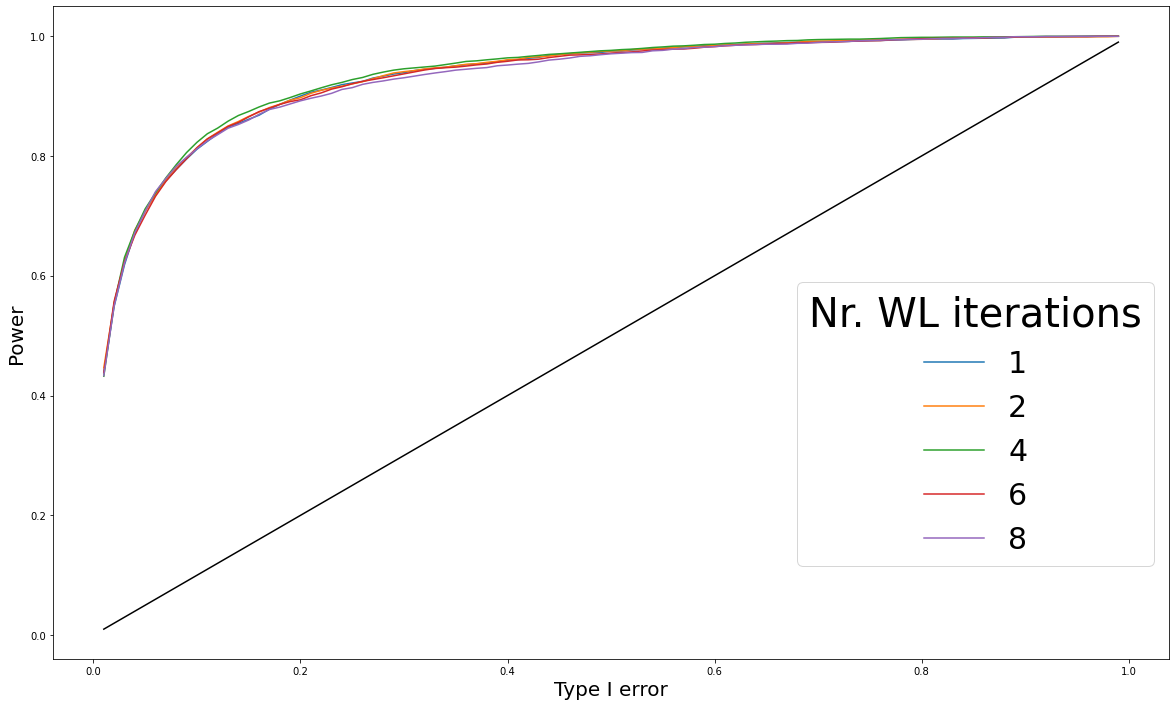

In [22]:
data['WLOA'] = readfoldertopanda("../data/SignedEdges2/WLOA")
#WL['wl_itr'] = get_wl_iteration(WL['kernel'])
print(np.unique(data['WLOA']['normalize']))
print(data['WLOA'].columns)

params_fixed = {'n':60,
                'm':60,
                'normalize':0,
                'p1':0.6,
                'p2':0.55
                }


plotVaryingBGDEG(df = data['WLOA'].copy(), param_vary_name = "nitr", params_fixed = params_fixed, mmd_stat = "MMD_u", color_name = "tab10", disp_title=False, legend_title= 'Nr. WL iterations', set_legend=True)

params_kernel['WLOA'] = [ 'normalize', 'nitr']
data_auc['WLOA'] = findAUC(keys = keys, params = params_kernel['WLOA'], stats = ['MMD_b', 'MMD_u'], df = data['WLOA'] )


# Compare all

In [23]:
key_pair = pd.DataFrame({'n':60,
                'm':60,
                'p1':0.6,
                'p2':0.55,
                'nr_nodes_1':50, 
                'nr_nodes_2':50
                },
                 index = [0])

stat = 'MMD_u_auc'
stat_plot = 'MMD_u'

best = []

for k,v in data.items():
    print(k)

    k_data_max = data_auc[k].reset_index().merge(key_pair, on = keys)
    k_data_max = k_data_max[k_data_max.groupby(keys)[stat].transform(max) == k_data_max[stat]].iloc[[0]]
    tmp_data = v.reset_index().merge(k_data_max, on = keys + params_kernel[k])
    tmp_data['kernel_name'] = k
    best.append(tmp_data)




#idx = wl_auc.groupby(['nr_nodes_1', 'nr_nodes_2', 'degree_1','degree_2', 'n', 'm'])['MMD_u_auc'].transform(max) == wl_auc['MMD_b_auc']


VH
EH
RW
WLOA


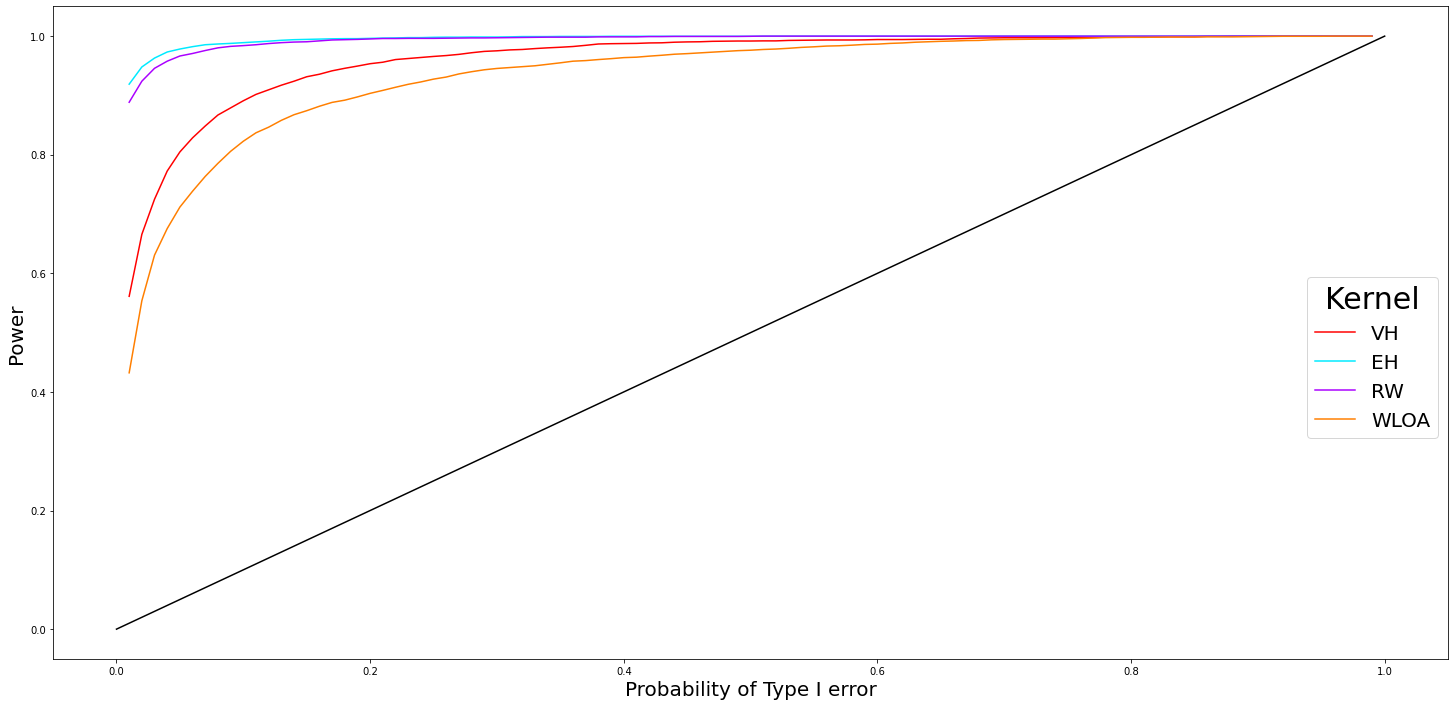

In [24]:
_, ax = plt.subplots(figsize = (25,12))


label = []
#icefire
#cmap = get_cmap(sns.color_palette("viridis", as_cmap=True)) # type: matplotlib.colors.ListedColormap
colors = ['#FF0000', '#00EAFF', '#AA00FF', '#FF7F00', '#8F2323', '#8F6A23', '#4F8F23', '#0040FF', '#737373', '#23628F']# cmap.colors[::int(len(cmap.colors)/(7+1))]  # type: list

for i,row in enumerate(best):

    if str(row['kernel_name'].iloc[0]) == 'PYRAMID':
        continue

    ax.plot(row['alpha'], row[stat_plot], color =colors[i], label=str(row['kernel_name'].iloc[0]))
    label.append(str(row['kernel_name'].iloc[0]))

ax.plot([0,1], [0,1], color = 'black')
# ax.plot(graph_stat['alpha'], graph_stat['average_degree'], color =colors[i+1], label='average_degree')
# label.append('average_degree')



h, l = ax.get_legend_handles_labels()

ax.legend(handles=h, labels=label, 
        handler_map = {tuple: matplotlib.legend_handler.HandlerTuple(None)}, title = 'Kernel', bbox_to_anchor=(1, 0.6), fontsize = 20, title_fontsize=30)

ax.set_xlabel('Probability of Type I error', fontsize = 20)
ax.set_ylabel('Power', fontsize = 20)
#ax.set_title(f'Number of samples = {key_pair["n"].iloc[0]}, Balance Difference = {key_pair["balance_difference"].iloc[0]}', fontsize = 20)



plt.show()